In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jepa_loss_file_name = "/home/rafik/Downloads/train_jepa_loss.csv"
perdim_var_file_name = "/home/rafik/Downloads/train_mean_perdim_context_var.csv"
vicreg_loss_file_name = "/home/rafik/Downloads/train_vicreg_loss.csv"


jepa_loss_df = pd.read_csv(jepa_loss_file_name)
perdim_var_df = pd.read_csv(perdim_var_file_name)
vicreg_loss_df = pd.read_csv(vicreg_loss_file_name)



print(jepa_loss_df.head())

print(jepa_loss_df['Run'].unique())

                                   Run                            Run ID  \
0  NOvicreg-absPE-fixedSeed-ContigOnly  5268af03ebfa4e098a6e5e3579e30eec   
1  NOvicreg-absPE-fixedSeed-ContigOnly  5268af03ebfa4e098a6e5e3579e30eec   
2  NOvicreg-absPE-fixedSeed-ContigOnly  5268af03ebfa4e098a6e5e3579e30eec   
3  NOvicreg-absPE-fixedSeed-ContigOnly  5268af03ebfa4e098a6e5e3579e30eec   
4  NOvicreg-absPE-fixedSeed-ContigOnly  5268af03ebfa4e098a6e5e3579e30eec   

            metric  step      timestamp     value  
0  train_jepa_loss     1  1756473488532  0.867395  
1  train_jepa_loss     5  1756473569996  0.159976  
2  train_jepa_loss     9  1756473651463  0.078720  
3  train_jepa_loss    13  1756473732853  0.073257  
4  train_jepa_loss    17  1756473814327  0.084197  
['NOvicreg-absPE-fixedSeed-ContigOnly'
 'vicreg-absPE-fixedSeed-PitchClsOnly' 'vicreg-relPE-fixedSeed-ContigOnly'
 'NOvicreg-absPE-fixedSeed-stricterLR' 'vicreg-absPE-fixedSeed-stricterLR'
 'vicreg-relPE-fixedSeed-stricterLR']


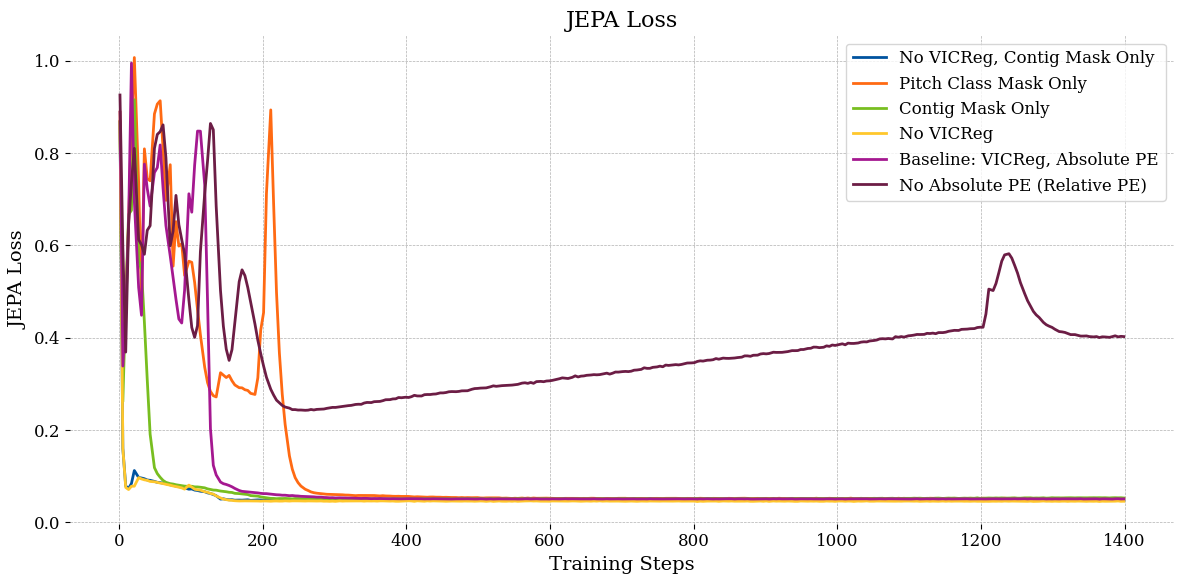

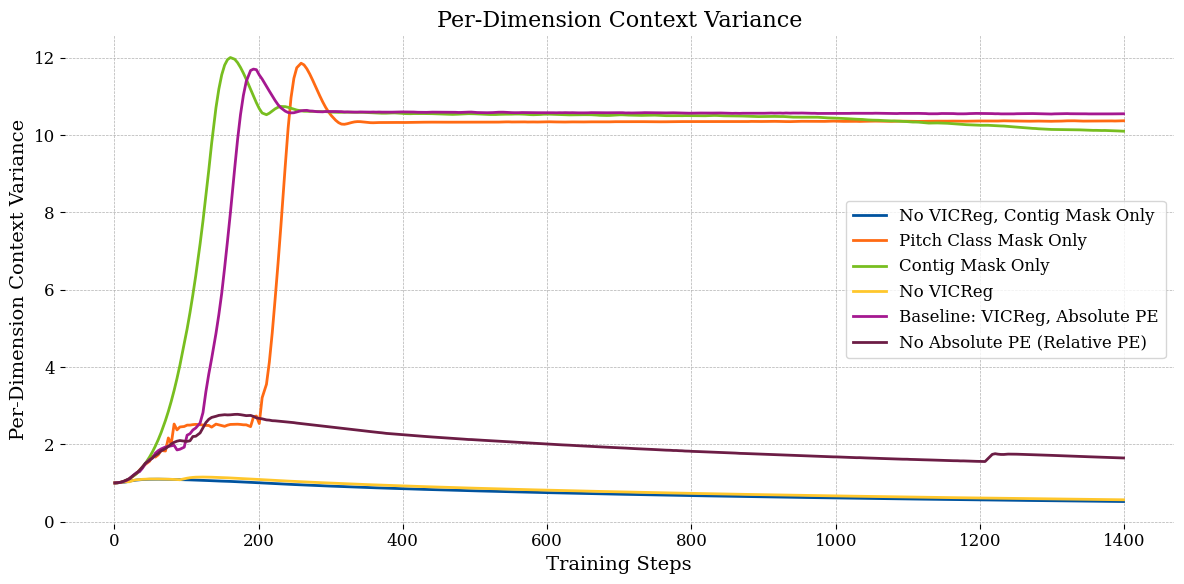

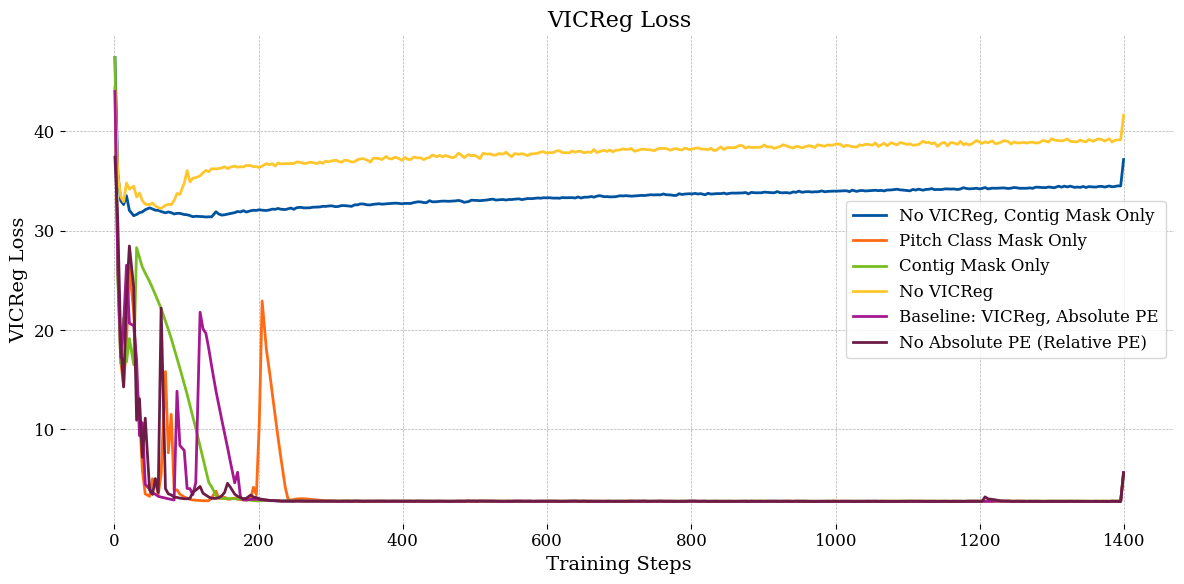

In [2]:
run_name_mapping = {
    'NOvicreg-absPE-fixedSeed-ContigOnly': 'No VICReg, Contig Mask Only',
 'vicreg-absPE-fixedSeed-PitchClsOnly': 'Pitch Class Mask Only',
   'vicreg-relPE-fixedSeed-ContigOnly': 'Contig Mask Only',
 'NOvicreg-absPE-fixedSeed-stricterLR': 'No VICReg',
   'vicreg-absPE-fixedSeed-stricterLR': 'Baseline: VICReg, Absolute PE',
    'vicreg-relPE-fixedSeed-stricterLR': 'No Absolute PE (Relative PE)'
    }


def make_plot(df, title, y_label, filename):
    plt.rc('font', size=12)         # Set global font size (adjust as necessary)

    # Alternatively, set a specific font (e.g., Times New Roman)
    plt.rc('font', family='serif')
    # Create the plot with enhanced aesthetics for a research paper
    plt.figure(figsize=(12, 6))  # Set figure size for better readability

    plt.rcParams.update({
        "axes.prop_cycle": plt.cycler(
            # linestyle=['-', '--', '-.', ':', '-', '--', '-.', ':'],
            # linestyle=['-', '-', '--', '--', '-.', '-.', ':', ':'],
            color=[
              "#00539F",  # IEEE Blue (primary, deep & strong)
              "#FF6A13",  # Bright Orange (high contrast vs. blue)
              "#78BE20",  # Vivid Green (fresh, distinct)
              "#FFC72C",  # Bold Gold/Yellow (attention-grabbing)
              "#A51890",  # Strong Magenta (contrasts with blue/green/yellow)
              "#6C1D45",  # Deep Burgundy (dark, pairs well with bright tones)
          ]
        ),
        "lines.linewidth": 2,
        "lines.markersize": 6
    })

    # print([x for x in pretraining_results])
    for run in run_name_mapping.keys():
        plt.plot(df[df['Run'] == run]['step'], df[df['Run'] == run]['value'],
                 label=run_name_mapping[run])
    # plt.plot( [x['train_loss'] for x in run_metric(pretraining_results, 'train_loss')], label='Train Loss')

    # Adding titles and labels with improved formatting
    # plt.title('Validation Loss vs. Steps', fontsize=16)
    plt.xlabel("Training Steps", fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # Improve tick readability
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add a grid for better visual clarity
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add a legend
    # plt.legend(loc='best', fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    # Tight layout to prevent clipping
    plt.title(title, fontsize=16)
    plt.legend(loc='best', fontsize=12)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


import os

os.makedirs("ablation_prelim", exist_ok=True)

make_plot(jepa_loss_df, "JEPA Loss", "JEPA Loss", "ablation_prelim/jepa_loss.pdf")
make_plot(perdim_var_df, "Per-Dimension Context Variance", "Per-Dimension Context Variance", "ablation_prelim/perdim_var.pdf")
make_plot(vicreg_loss_df, "VICReg Loss", "VICReg Loss", "ablation_prelim/vicreg_loss.pdf")


